In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_palette = "Pastel"
     

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')     

## DATA PREPARATION

In [3]:
apps = apps_df.drop_duplicates()
print(f"Total number of apps in the given dataset = {len(apps)}")

Total number of apps in the given dataset = 9659


In [4]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [6]:
apps.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


## DATA CLEANING

In [7]:
chars_to_remove = [',', '$', '+']
columns_to_clean = ['Installs', 'Price']
for col in columns_to_clean:
  for char in chars_to_remove:
    apps[col] = apps[col].astype(str).str.replace(char, '')
  apps[col] = pd.to_numeric(apps[col])
# here we are replacing the characters to remove with an empty string

## MARKET SHARE OF EACH CATEGORY OF APPS

In [8]:
num_categories = len(apps['Category'].unique())
print(f"Number of categories = {num_categories}")

Number of categories = 33


In [9]:
num_of_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

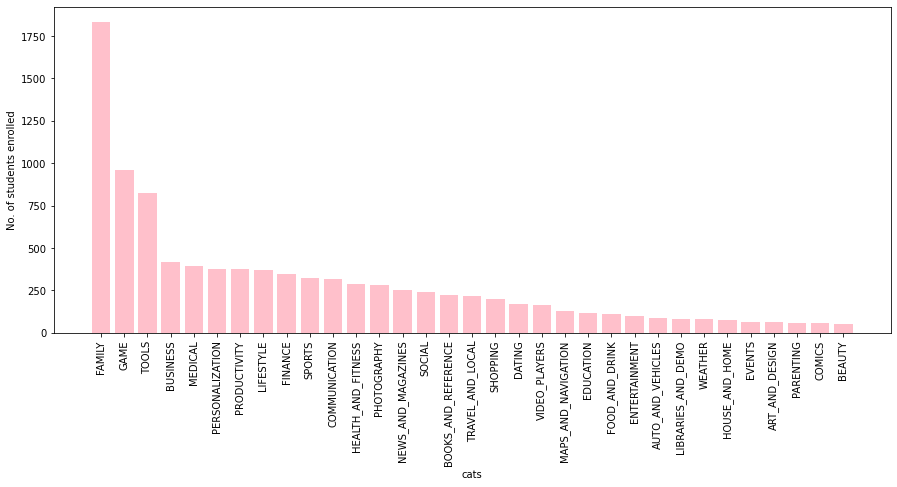

In [10]:
x = num_of_apps_in_category.index
y = num_of_apps_in_category.values
fig = plt.figure(figsize = (15, 6))
plt.bar(x, y, color = "Pink")
plt.xticks(rotation=90)
plt.xlabel("cats")
plt.ylabel(f"No. of students enrolled")
plt.show()

## DISTRIBUTION OF APP RATINGS

In [11]:
avg_app_rating = apps['Rating'].mean()
print(f"Average app rating = {avg_app_rating}")

Average app rating = 4.173243045387994


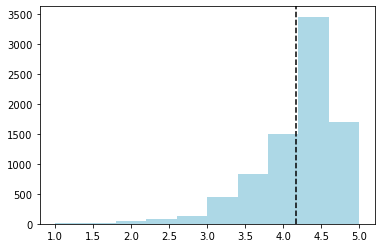

In [12]:
histx = apps['Rating']
plt.hist(histx, color = "Lightblue")
plt.axvline(avg_app_rating, color = "Black", linestyle = '--', label = 'Average rating line')
plt.show()

## SIZE AND PRICE OF AN APP

In [13]:
sns.set_style("darkgrid")
# we now have the new dataframe that only has the apps that dont have null values in size and ratings categories
apps_complete = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
apps_complete.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
dfa = apps_complete['Category'].value_counts().to_frame(name='count')
dfa.head(12)

,count
Category,
FAMILY,1512
GAME,832
TOOLS,626
PERSONALIZATION,276
LIFESTYLE,269
MEDICAL,266
FINANCE,258
PRODUCTIVITY,223
BUSINESS,222


In [15]:
# Subset for categories with at least 250 apps
large_categories = apps_complete.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
dfa2 = large_categories['Category'].value_counts().to_frame(name='count')
dfa2.head(10)
# this shows there are 7 categories that have more than 250 apps
     

,count
Category,
FAMILY,1512
GAME,832
TOOLS,626
PERSONALIZATION,276
LIFESTYLE,269
MEDICAL,266
FINANCE,258


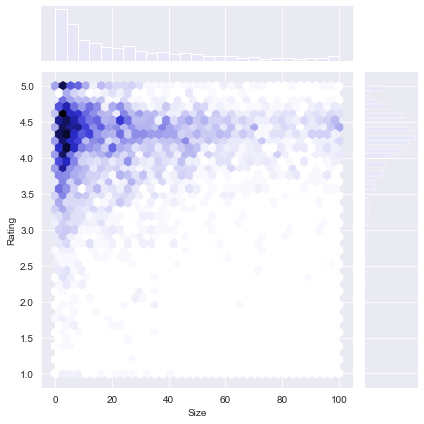

In [16]:
# plot of size vs rating, only for the categories that have more than 250 apps
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex', color = 'Lavender')
     

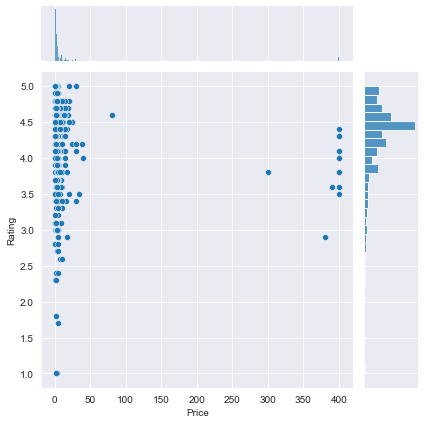

In [17]:
# plot of price vs rating
paid_apps = apps_complete[apps_complete['Type'] == 'Paid']
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])


## PRICING OF THE APP ACCORDING TO CATEGORY

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


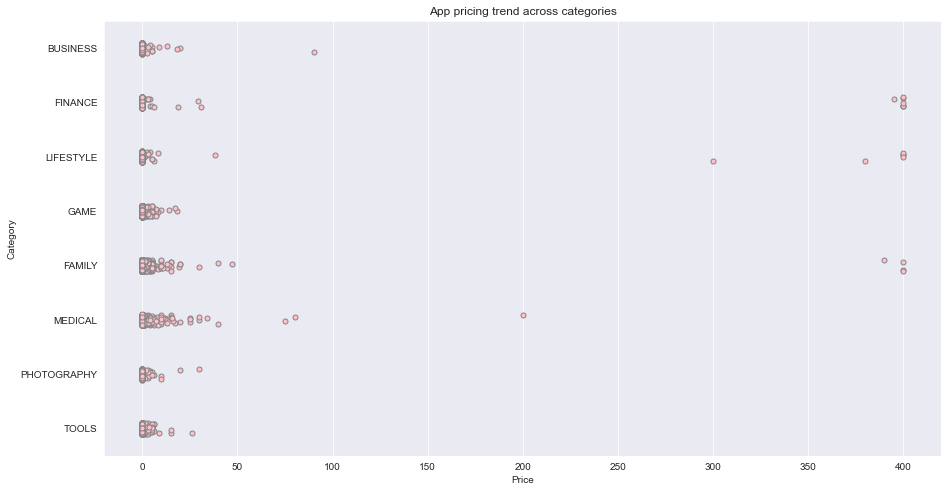

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Selecting a few popular app categories
popular_app_cats = apps[apps["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examining the price trend by plotting Price vs Category
ax = sns.stripplot(x ='Price', y = 'Category',data=popular_app_cats, jitter=True, linewidth=1, color = "Pink")
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200
     


## FILTERING OUT HEAVILY PRICED APPS

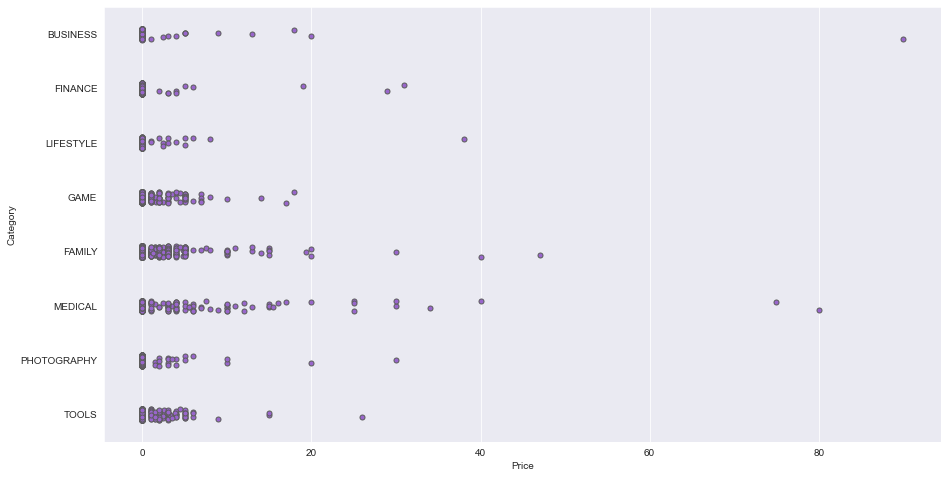

In [20]:
# selecting apps below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]
dark_lavender = (0.6, 0.4, 0.8)
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x = 'Price', y='Category', data = apps_under_100, jitter = True, linewidth = 1, color = dark_lavender)
     

## ANALYSING POPULARITY OF PAID vs FREE APPS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


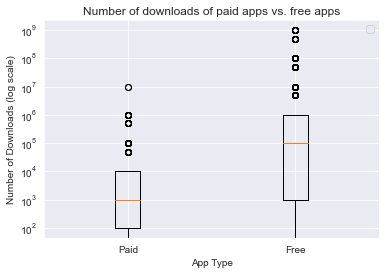

In [21]:
paid_installs = apps[apps['Type'] == 'Paid']['Installs']
free_installs = apps[apps['Type'] == 'Free']['Installs']

# Create boxplot
box = plt.boxplot([paid_installs, free_installs], labels=['Paid', 'Free'], vert=True)

# Set y-axis to log scale
plt.yscale('log')

# Set labels and title
plt.xlabel('App Type')
plt.ylabel('Number of Downloads (log scale)')
plt.title('Number of downloads of paid apps vs. free apps')
plt.legend()

# Show the plot
plt.show()


## SENTIMENT ANALYSIS

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61540,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
61546,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
61553,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
61554,9862,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,NaN,10000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


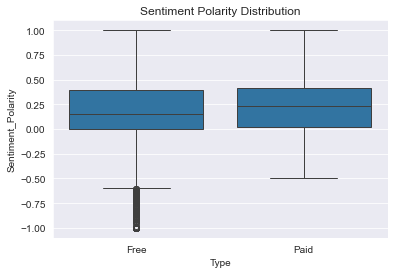

In [22]:
# here we're using the reviews dataset that contains sentiment analysis information
merged_df = pd.merge(apps, reviews_df, on='App', how = 'inner')
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])
fig, ax = plt.subplots()
fig.set_size = (11, 8)
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')
merged_df